# <img src='Capture.PNG'>

In [36]:
import numpy as np
import matplotlib.pyplot as plt

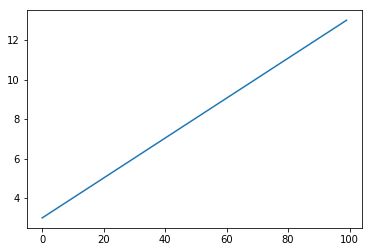

In [37]:
#plotting line y=x+3
x=np.linspace(0,10,num=100)
y=x+3
plt.plot(y)

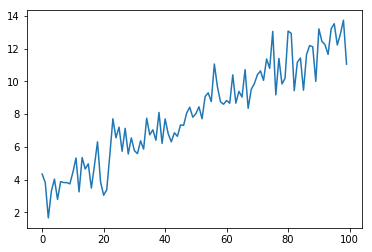

In [38]:
#plotting line y=(x+3)+noise
noise = np.random.normal(0, 1,x.shape)
ynew=y+noise
plt.plot(ynew)

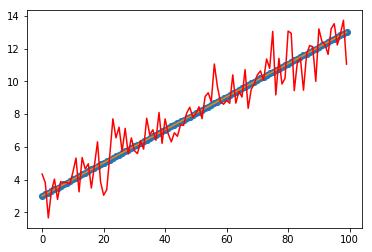

In [39]:
#plotting original line and line with noise
plt.plot(x+3,'o',y,'-',ynew,'r')

In [40]:
#adding column of 1 to feature set
x_norm=np.c_[np.ones(x.shape[0]),x]
x_norm.shape

(100, 2)

In [41]:
#initializing theta with zeros
theta = np.zeros(2)
# Parameters required for Gradient Descent
alpha = 0.001   #learning rate
m = y.size  #no. of samples
np.random.seed(10)  
def gradient_descent(x_norm,ynew,m,theta,alpha):
    cost_list=[]
    theta_list=[]
    prediction_list=[]
    cost_list.append(1e3)#large inital cost=10^3
    run=True
    i=0
    #iterating gradient descent
    while run:
        y_pred=np.dot(x_norm,theta) #predicted y value i.e x0*theta0+x1*theta1...
        prediction_list.append(y_pred)
        error=y_pred-ynew
        #cost=sum[error^2]
        cost=1/(2*m)*np.dot(error.T,error) 
        cost_list.append(cost)
        #theta=theta- alpha * (1/m) * sum[error*x]
        theta=theta-(alpha*(1/m)*np.dot(x_norm.T,error))
        theta_list.append(theta) 
        if cost_list[i]-cost_list[i+1]< 1e-9:#checking if the change in cost function is less than 10^(-9)
            run=False
        i=i+1
    cost_list.pop(0)#remove intital cost 
    return prediction_list, cost_list, theta_list

In [42]:
prediction_list, cost_list, theta_list = gradient_descent(x_norm,y,m,theta,alpha)

In [43]:
#final theta values
theta=theta_list[-1]
theta

array([2.99601792, 1.00059875])

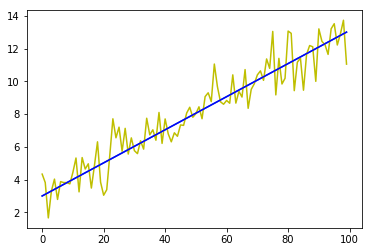

In [44]:
#original and predicted line along with data points
plt.plot(y,'-',ynew,'y',prediction_list[-1],'b')

# Using Psuedo Inverse

In [45]:
#formula for psuedo inverse
psuedo=np.dot(np.linalg.inv(np.dot(x_norm.T,x_norm)),x_norm.T)

In [46]:
#final theta values
theta_=np.dot(psuedo,ynew)
theta_

array([3.20817371, 0.97424859])

In [47]:
prediction=np.dot(x_norm,theta_)

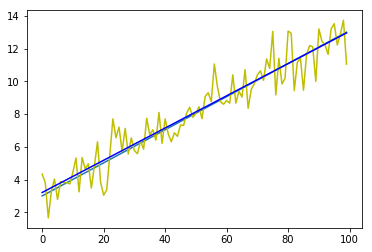

In [48]:
#original and predicted line along with data points
plt.plot(y,'-',ynew,'y',prediction,'b')

## Conclusion

#### Gradient Descent Approach is better than Psuedo inverse Approach for Large data points